In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


new_df_all_nopq_shuffled = pd.read_pickle("new_df_all_nopq_shuffled.pkl")

# new_df_all_2pq_shuffled = pd.read_pickle("new_df_all_2pq_shuffled.pkl")

new_df_all_25pq_shuffled = pd.read_pickle("new_df_all_25pq_shuffled.pkl")

# new_df_all_jpsi4pi_sigma = pd.read_pickle("new_df_all_jpsi4pi_sigma.pkl")

# new_df_jpsi4pi_sigma_filtered = pd.read_pickle("new_df_jpsi4pi_sigma_filtered.pkl")

training_new_df_all_nopq_shuffled = pd.read_pickle("training_new_df_all_nopq_shuffled.pkl")

new_df_all_anomalies_shuffled = pd.read_pickle("new_df_all_anomalies_shuffled.pkl")

2025-08-10 13:25:35.310182: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
new_df_all_nopq_shuffled 

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,...,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
2103020,2103020,0.598613,2,2.359401,0.283101,0.490191,2.336813,2.999605,2.346582,0.242953,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
601472,601472,1.015029,2,2.302529,0.164173,0.128645,1.145839,2.397652,2.400843,0.169405,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
523963,523963,0.293339,2,1.275848,0.183524,0.761731,2.974524,3.229348,1.455585,0.123700,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
901314,901314,0.774294,2,2.343787,0.068399,0.176347,1.822877,2.772450,2.376404,0.176018,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1780146,1780146,0.293278,2,1.209099,0.295969,0.679810,2.963185,3.226064,1.259608,0.209673,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56552,56552,2.999046,2,2.270574,0.326911,0.393982,0.706086,0.150001,2.357175,0.028652,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1366971,1366971,0.230305,2,2.313283,0.183697,1.354843,3.120561,3.272570,2.135240,0.283008,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1295797,1295797,0.979760,2,2.311866,0.123480,0.080152,1.246359,2.458456,2.307084,0.139663,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1969771,1969771,0.772226,2,2.311083,0.038200,0.074242,1.778738,2.756773,2.094101,0.753839,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


In [3]:
# new_df_jpsi4pi_sigma_filtered

In [4]:
df = pd.DataFrame(new_df_all_25pq_shuffled)
df

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,...,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.109270,2,2.485775,0.415620,0.361518,0.091693,0.743454,2.288051,0.265041,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.0,10.0,10.0
1,1,3.110827,2,2.339230,0.088836,0.152302,0.469110,0.294841,2.357524,0.025860,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.0,10.0,10.0
2,2,3.163454,2,2.401996,0.127951,0.068202,0.238795,0.461255,2.241443,0.424620,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.0,10.0,10.0
3,3,3.008605,2,2.338532,0.092721,0.155569,0.449943,0.348181,2.450492,0.292864,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.0,10.0,10.0
4,4,3.014302,2,2.385144,0.067888,0.007947,0.273890,0.485013,2.298807,0.229447,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,20,4.395997,3,2.467794,0.347910,0.296148,0.131937,0.946082,2.378195,0.054383,...,1.365388,3.451097,3.504794,2.491548,0.137904,10.0,10.0,10.0,10.0,10.0
21,21,4.389992,3,2.465410,0.348323,0.291893,0.021369,0.587346,2.285853,0.273466,...,1.338860,3.541857,3.595077,2.548366,0.118789,10.0,10.0,10.0,10.0,10.0
22,22,4.423226,3,2.365470,0.001947,0.060030,0.374969,0.358877,2.427922,0.218990,...,1.154534,4.178134,4.237801,3.119586,0.208833,10.0,10.0,10.0,10.0,10.0
23,23,4.334254,3,2.409994,0.148308,0.093303,0.075553,0.800276,2.267509,0.327030,...,1.268879,3.782472,3.836508,2.735847,0.026707,10.0,10.0,10.0,10.0,10.0


In [5]:
new_df_all_nopq_shuffled

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,...,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
2103020,2103020,0.598613,2,2.359401,0.283101,0.490191,2.336813,2.999605,2.346582,0.242953,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
601472,601472,1.015029,2,2.302529,0.164173,0.128645,1.145839,2.397652,2.400843,0.169405,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
523963,523963,0.293339,2,1.275848,0.183524,0.761731,2.974524,3.229348,1.455585,0.123700,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
901314,901314,0.774294,2,2.343787,0.068399,0.176347,1.822877,2.772450,2.376404,0.176018,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1780146,1780146,0.293278,2,1.209099,0.295969,0.679810,2.963185,3.226064,1.259608,0.209673,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56552,56552,2.999046,2,2.270574,0.326911,0.393982,0.706086,0.150001,2.357175,0.028652,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1366971,1366971,0.230305,2,2.313283,0.183697,1.354843,3.120561,3.272570,2.135240,0.283008,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1295797,1295797,0.979760,2,2.311866,0.123480,0.080152,1.246359,2.458456,2.307084,0.139663,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1969771,1969771,0.772226,2,2.311083,0.038200,0.074242,1.778738,2.756773,2.094101,0.753839,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


In [6]:
training_new_df_all_nopq_shuffled

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,...,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
19293,19293,1.410681,2,1.788090,1.914747,1.866190,0.005398,1.898151,1.616994,2.495840,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
123,123,3.654862,2,2.332501,0.103994,0.170348,0.581923,0.031687,2.237298,0.430964,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
26529,26529,1.339654,2,1.467056,2.955005,2.852139,0.261409,1.869446,2.065489,0.938610,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
15702,15702,3.089820,2,1.877873,1.689746,1.773769,1.963063,0.498805,2.252955,0.395265,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
21421,21421,0.243268,2,0.102932,0.535566,1.508408,3.126277,3.274109,0.039535,0.412180,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17719,17719,3.095459,2,2.134999,0.802259,0.871557,1.030725,0.171428,2.288310,0.273166,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
17805,17805,0.241382,2,0.127534,0.481011,1.482563,3.124991,3.273760,0.660928,0.041406,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
8064,8064,1.550950,2,1.939805,1.441211,1.439717,0.172141,1.662936,1.849406,1.750939,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
9983,9983,1.251578,2,0.715119,5.340975,5.081134,0.828956,1.765995,1.018779,4.334930,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


In [7]:
X_new = training_new_df_all_nopq_shuffled[['NTracks','NSigmaEl1','NSigmaMu1','NSigmaPi1','NSigmaKa1','NSigmaPr1','NSigmaEl2','NSigmaMu2','NSigmaPi2','NSigmaKa2','NSigmaPr2','NSigmaEl3','NSigmaMu3','NSigmaPi3','NSigmaKa3','NSigmaPr3','NSigmaEl4','NSigmaMu4','NSigmaPi4','NSigmaKa4','NSigmaPr4']].values
# # Extract mass separately
# mass = df['mass'].values
mass_new = training_new_df_all_nopq_shuffled['InvariantMass'].values
# # Create a train/test split
X_new_train, X_new_test, mass_new_train, mass_new_test = train_test_split(X_new, mass_new, test_size=0.05, random_state=42)

from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform training data, transform test data
X_new_train = scaler.fit_transform(X_new_train)
X_new_test = scaler.transform(X_new_test)

print(X_new_train.shape, X_new_test.shape)

(171000, 21) (9000, 21)


In [8]:
X_new

array([[ 2.        ,  1.78809039,  1.91474683, ..., 10.        ,
        10.        , 10.        ],
       [ 2.        ,  2.33250066,  0.10399437, ..., 10.        ,
        10.        , 10.        ],
       [ 2.        ,  1.46705552,  2.95500532, ..., 10.        ,
        10.        , 10.        ],
       ...,
       [ 2.        ,  1.93980464,  1.44121143, ..., 10.        ,
        10.        , 10.        ],
       [ 2.        ,  0.71511921,  5.34097475, ..., 10.        ,
        10.        , 10.        ],
       [ 2.        ,  1.91047485,  1.52330183, ..., 10.        ,
        10.        , 10.        ]])

In [9]:
print(X_new_train.shape[0])

171000


In [10]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Available devices:", tf.config.list_physical_devices())
# tf.debugging.set_log_device_placement(True)

TensorFlow version: 2.16.2
Available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [11]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Disable GPU (if any)


In [12]:
# #------------------------------------------
# # 2. Define the Autoencoder Model
# #------------------------------------------

input_dim = X_new_train.shape[1]  # should be 6
encoding_dim = 11             # latent space dimension

# # Input layer
input_layer = Input(shape=(input_dim,))

# # Encoding layer (compression)
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# # Decoding layer (reconstruction)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# # Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)
# autoencoder.compile(optimizer='adam', loss='mse')
from tensorflow.keras.optimizers import Adam
autoencoder.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
# autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse') # best, 185 epochs automatic stop

#------------------------------------------
# 3. Train the Autoencoder
#------------------------------------------

early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=2,
    restore_best_weights=True
)

history = autoencoder.fit(X_new_train, X_new_train, 
                          epochs=500,
                          # epochs=500,
                          batch_size=256,
                        #   batch_size=64,
                          shuffle=True,
                          validation_data=(X_new_test, X_new_test),
                          verbose=2,
                          callbacks=[early_stopping]
                         )

# with tf.device('/CPU:0'):
#     history = autoencoder.fit(X_train, X_train,
#                               epochs=500,
#                               batch_size=64,
#                               validation_data=(X_test, X_test),
#                               callbacks=[early_stopping],
#                               verbose=2)
#     print(f"Training stopped at epoch {len(history.history['loss'])}")

print(f"Training stopped at epoch {len(history.history['loss'])}")


Epoch 1/500
668/668 - 2s - 4ms/step - loss: 0.0088 - val_loss: 5.6557e-04
Epoch 2/500
668/668 - 1s - 2ms/step - loss: 5.1557e-04 - val_loss: 4.7159e-04
Epoch 3/500
668/668 - 1s - 2ms/step - loss: 4.6120e-04 - val_loss: 4.2222e-04
Epoch 4/500
668/668 - 1s - 2ms/step - loss: 4.0799e-04 - val_loss: 3.7232e-04
Epoch 5/500
668/668 - 1s - 2ms/step - loss: 3.5958e-04 - val_loss: 3.2813e-04
Epoch 6/500
668/668 - 1s - 2ms/step - loss: 3.3050e-04 - val_loss: 3.0865e-04
Epoch 7/500
668/668 - 1s - 2ms/step - loss: 3.1426e-04 - val_loss: 3.0194e-04
Epoch 8/500
668/668 - 1s - 2ms/step - loss: 3.0573e-04 - val_loss: 2.9212e-04
Epoch 9/500
668/668 - 1s - 2ms/step - loss: 2.9908e-04 - val_loss: 2.8734e-04
Epoch 10/500
668/668 - 1s - 2ms/step - loss: 2.9424e-04 - val_loss: 2.8555e-04
Epoch 11/500
668/668 - 1s - 2ms/step - loss: 2.8481e-04 - val_loss: 2.8020e-04
Epoch 12/500
668/668 - 1s - 2ms/step - loss: 2.7645e-04 - val_loss: 2.7371e-04
Epoch 13/500
668/668 - 1s - 2ms/step - loss: 2.6528e-04 - val_los

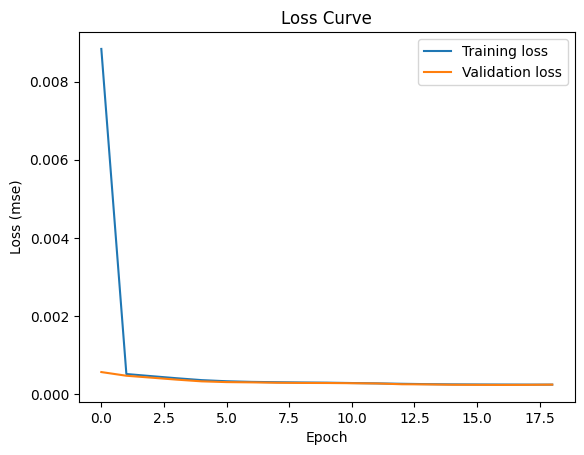

In [13]:
# Optional: Plot the loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (mse)')
plt.title('Loss Curve')
plt.legend()
plt.savefig("final_loss2.pdf")
plt.show()

In [14]:
# #------------------------------------------
# # 4. Use the Autoencoder for Anomaly Detection
# #------------------------------------------

# # Compute reconstruction on the test set
X_new_test_pred = autoencoder.predict(X_new_test)
# # Calculate MSE per sample
mse = np.mean(np.power(X_new_test - X_new_test_pred, 2), axis=1)
#plot

# You need to define a threshold for what you consider "anomalous"
# This could be determined by analyzing the MSE distribution on training data, for example.
threshold = 0.01 #np.mean(mse) + 3*np.std(mse)  # Example heuristic

# Find anomalous events
anomalous_indices = np.where(mse > threshold)[0]

#------------------------------------------
# 5. Retrieve the Mass for Anomalous Events
#------------------------------------------

# For any anomalous event, we can now look up its mass
if len(anomalous_indices) > 0:
    print("Anomalous Event Indices:", anomalous_indices)
    print("Mass values for anomalous events:", mass_new_test[anomalous_indices])
else:
    print("No anomalies detected under this threshold.")


282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Anomalous Event Indices: [5093]
Mass values for anomalous events: [0.21141465]


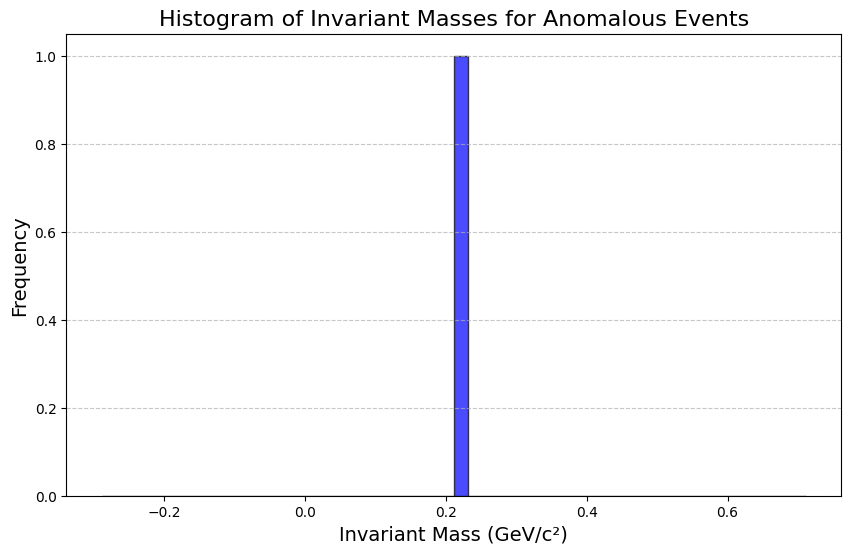

In [15]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(mass_new_test[anomalous_indices], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Invariant Masses for Anomalous Events', fontsize=16)
plt.xlabel('Invariant Mass (GeV/c²)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.show()


Reconstruction error for anomalous events (label 0):
[2.09068206e-04 2.26194616e-04 1.62674281e-04 ... 1.33913090e-04
 1.98881710e-04 6.23394908e-05]


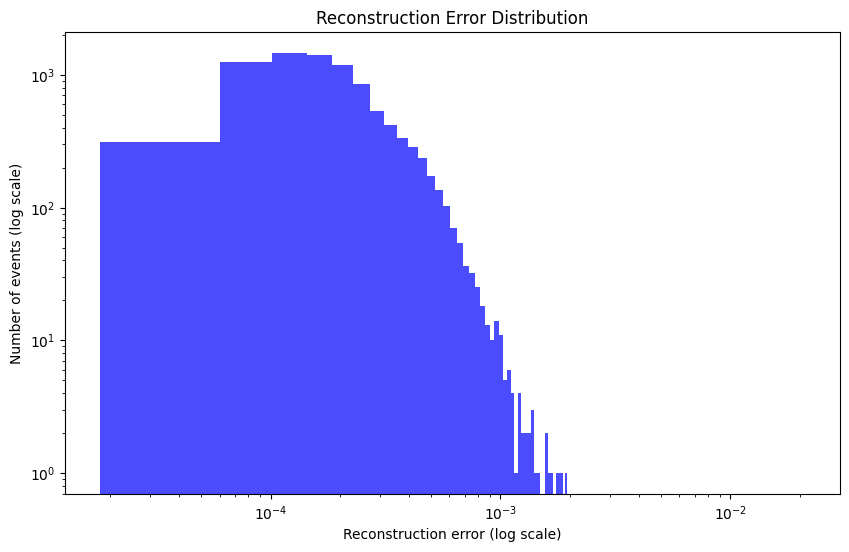

In [16]:
print("\nReconstruction error for anomalous events (label 0):")
print(mse)

# Plot the distributions of reconstruction errors for normal and anomalous events

plt.figure(figsize=(10, 6))
plt.xscale('log')  # Log scale for x-axis
plt.yscale('log')  # Log scale for y-axis
# Plot reconstruction error for normal events
# plt.hist(mse_normal, bins=50, alpha=0.7, label='Normal Events (Label 1)', color='blue')

# Plot reconstruction error for anomalous events
# plt.hist(mse_anomalous, bins=50, alpha=0.7, label='Anomalous Events', color='red')
# plt.hist(mse_anomalous, bins=50, alpha=0.7, label='Anomalous Events (Label 0)', color='red')

# Add labels and title
plt.hist(mse, bins=500, alpha=0.7, label="Normal Events", log=True, color = 'blue')  # Increase bins to 200 for finer binning and set log scale for y-axis
#plt.xscale('log')  # Log scale for x-axis
#plt.yscale('log')  # Log scale for y-axis
plt.xlabel("Reconstruction error (log scale)")
plt.ylabel("Number of events (log scale)")
plt.title("Reconstruction Error Distribution")
plt.show()

In [17]:
new_anom = new_df_all_anomalies_shuffled[['NTracks','NSigmaEl1','NSigmaMu1','NSigmaPi1','NSigmaKa1','NSigmaPr1','NSigmaEl2','NSigmaMu2','NSigmaPi2','NSigmaKa2','NSigmaPr2','NSigmaEl3','NSigmaMu3','NSigmaPi3','NSigmaKa3','NSigmaPr3','NSigmaEl4','NSigmaMu4','NSigmaPi4','NSigmaKa4','NSigmaPr4']].values
# # Extract mass separately
# mass = df['mass'].values
mass_new_anom = new_df_all_anomalies_shuffled['InvariantMass'].values

new_anom = scaler.transform(new_anom)

In [18]:
new_df_all_anomalies_shuffled

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,...,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
70292,70292,3.119739,2,2.276250,0.305507,0.373051,0.711927,0.097383,2.435513,0.242731,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
184068,184068,0.279405,2,0.725988,0.624564,0.517527,2.962056,3.226194,1.060945,0.116106,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
2012040,2012040,0.585374,2,2.240184,0.068731,0.175164,2.257607,2.975770,2.255760,0.020253,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
700469,700469,0.903150,2,2.299650,0.140232,0.075455,1.409149,2.561893,2.223917,0.394721,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
59507,59507,1.805421,2,2.235254,0.459111,0.505201,0.236952,1.153243,2.322287,0.158524,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066049,2066049,0.228514,2,3.097996,0.045779,1.279531,3.114053,3.270715,3.171530,0.008190,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1753929,1753929,0.238800,2,1.921477,0.687773,0.743199,3.044877,3.250885,0.881111,0.108340,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1829392,1829392,0.304279,2,1.797033,0.503635,1.223295,3.025797,3.243886,1.054263,0.864468,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1468553,1468553,0.525891,2,2.217697,0.017025,0.290767,2.431759,3.043325,2.237341,0.041966,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


In [19]:
new_anom_pred = autoencoder.predict(new_anom)
mse_new_anom = np.mean(np.power(new_anom - new_anom_pred, 2), axis=1)


71954/71954 ━━━━━━━━━━━━━━━━━━━━ 116s 2ms/step


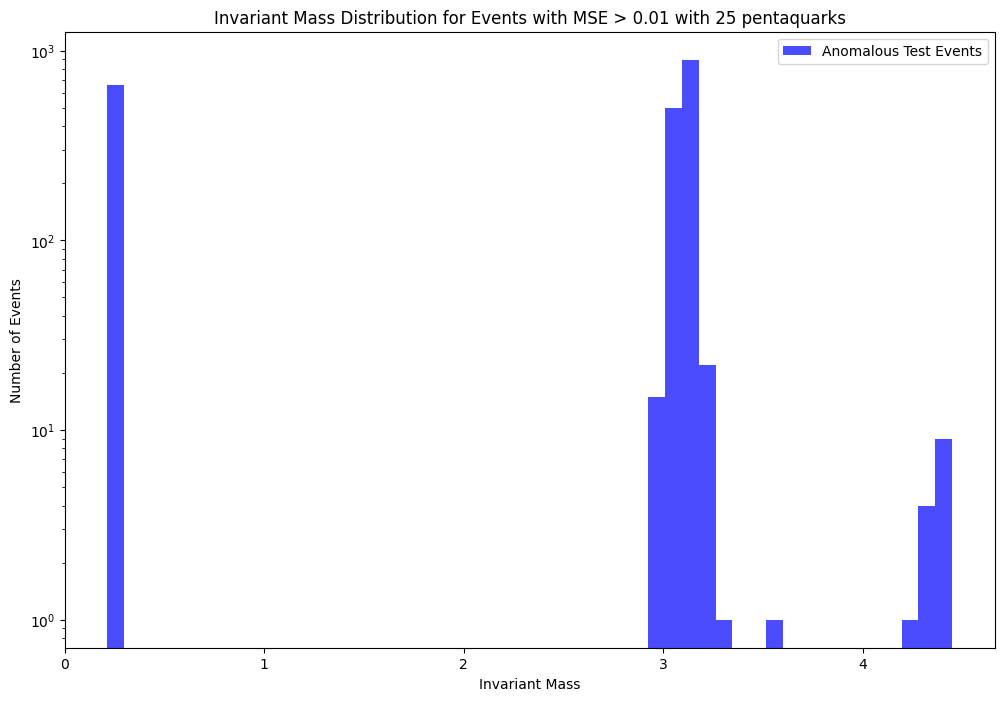

In [20]:
# Set the reconstruction error threshold
mse_threshold = 0.01  # Adjust this value as needed

# Filter test events with reconstruction error above the threshold
new_anom_high_mse_indices = mse_new_anom > mse_threshold  # Boolean mask for filtering
new_anom_high_mse_masses = mass_new_anom[new_anom_high_mse_indices]

# Plot the invariant mass distribution
plt.figure(figsize=(12, 8))

plt.hist(new_anom_high_mse_masses, bins=50, alpha=0.7, label='Anomalous Test Events', color='blue')
# plt.hist(pentaquark_masses, bins=50, alpha=0.7, label='Pentaquark Events', color='red')
# plt.hist(psi2s_masses, bins=50, alpha=0.7, label='Psi2s -> J/Psi + Pions Events', color='green')

# Add labels and title
plt.xlabel('Invariant Mass')
plt.ylabel('Number of Events')
plt.yscale('log')
plt.title(f'Invariant Mass Distribution for Events with MSE > {mse_threshold} with 25 pentaquarks')
plt.legend()

# Show the plot
plt.show()


In [21]:
new_anom_high_mse_masses

array([3.10740318, 3.09058501, 0.21133955, ..., 3.0988582 , 0.21132497,
       0.2113304 ])

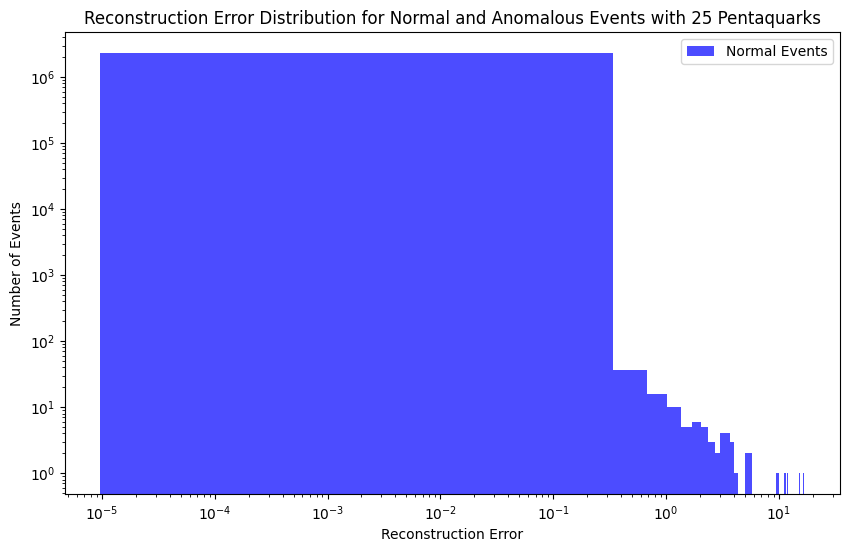

In [22]:
plt.figure(figsize=(10, 6))
plt.xscale('log')  # Log scale for x-axis
plt.yscale('log')  # Log scale for y-axis

plt.hist(mse_new_anom, bins=50, alpha=0.7, label='Normal Events', color='blue')

plt.xlabel('Reconstruction Error')
plt.ylabel('Number of Events')
plt.title('Reconstruction Error Distribution for Normal and Anomalous Events with 25 Pentaquarks')
plt.legend()

# Show the plot
plt.show()

In [23]:
number_pqs_25 = np.sum((new_anom_high_mse_masses >= 4) & (new_anom_high_mse_masses <= 5))
number_pqs_25

14

In [24]:
mse_threshold = 0.01
mass_cutoff = 1.5

df_mass_cut_noexotica = new_df_all_nopq_shuffled[new_df_all_nopq_shuffled['InvariantMass'] > mass_cutoff]
X_alice_noexotica = df_mass_cut_noexotica[['NTracks','NSigmaEl1','NSigmaMu1','NSigmaPi1','NSigmaKa1','NSigmaPr1','NSigmaEl2','NSigmaMu2','NSigmaPi2','NSigmaKa2','NSigmaPr2','NSigmaEl3','NSigmaMu3','NSigmaPi3','NSigmaKa3','NSigmaPr3','NSigmaEl4','NSigmaMu4','NSigmaPi4','NSigmaKa4','NSigmaPr4']].values
X_alice_noexotica = scaler.transform(X_alice_noexotica)

X_alice_noexotica_pred = autoencoder.predict(X_alice_noexotica)
mse_alice_noexotica = np.mean(np.power(X_alice_noexotica - X_alice_noexotica_pred, 2), axis=1)

df_high_mse_noexotica = df_mass_cut_noexotica[mse_alice_noexotica > mse_threshold]
alice_noexotica_masses = df_high_mse_noexotica['InvariantMass'].values

# ALICE, with exotica
df_mass_cut_exotica = new_df_all_anomalies_shuffled[new_df_all_anomalies_shuffled['InvariantMass'] > mass_cutoff]
X_alice_exotica = df_mass_cut_exotica[['NTracks','NSigmaEl1','NSigmaMu1','NSigmaPi1','NSigmaKa1','NSigmaPr1','NSigmaEl2','NSigmaMu2','NSigmaPi2','NSigmaKa2','NSigmaPr2','NSigmaEl3','NSigmaMu3','NSigmaPi3','NSigmaKa3','NSigmaPr3','NSigmaEl4','NSigmaMu4','NSigmaPi4','NSigmaKa4','NSigmaPr4']].values
X_alice_exotica = scaler.transform(X_alice_exotica)

X_alice_exotica_pred = autoencoder.predict(X_alice_exotica)
mse_alice_exotica = np.mean(np.power(X_alice_exotica - X_alice_exotica_pred, 2), axis=1)

df_high_mse_exotica = df_mass_cut_exotica[mse_alice_exotica > mse_threshold]
alice_exotica_masses = df_high_mse_exotica['InvariantMass'].values

9475/9475 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step
9771/9771 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


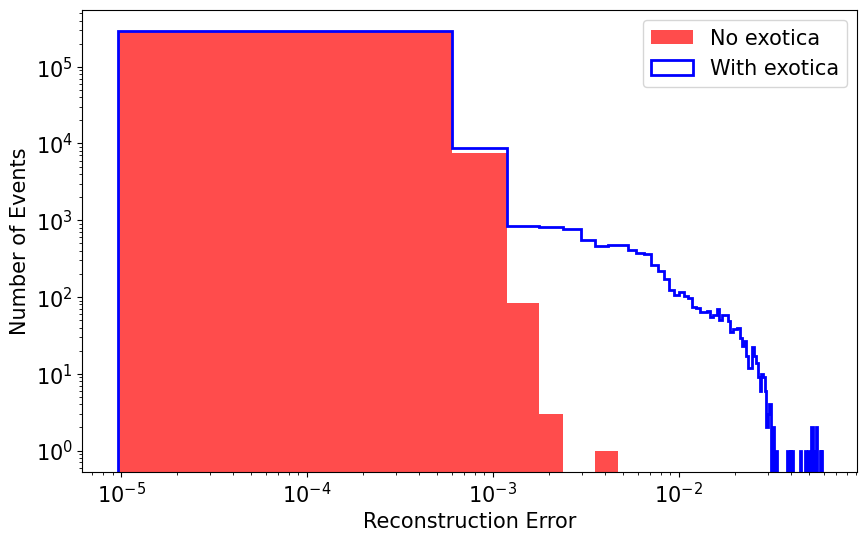

In [25]:
combined = np.concatenate([mse_alice_noexotica, mse_alice_exotica])

n_bins = 100

bin_edges = np.linspace(combined.min(), combined.max(), n_bins + 1)

plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 15})
plt.xscale('log')  # Log scale for x-axis
plt.yscale('log')  # Log scale for y-axis

# Plot reconstruction error for normal events
plt.hist(mse_alice_noexotica, bins=bin_edges, alpha=0.7, label='No exotica', color='red')
plt.hist(mse_alice_exotica, bins=bin_edges, histtype='step', color='blue', linewidth=2, label='With exotica')

# plt.hist(mse_normal, bins=50, alpha=0.7, label='Normal Events (Label 1)', color='blue')

# Plot reconstruction error for anomalous events
#plt.hist(mse_anomalous, bins=50, alpha=0.7, label='Anomalous Events', color='red')
#plt.hist(mse_anomalous, bins=50, alpha=0.7, label='Anomalous Events (Label 0)', color='red')

# Add labels and title
plt.xlabel('Reconstruction Error')
plt.ylabel('Number of Events')
#plt.title('Reconstruction Error Distribution for ALICE cocktail, w/ and w/o exotica')
#plt.ylim(0.01,10**8)
#plt.xlim(0.01,100)
plt.legend()

plt.savefig("final_error2.pdf")

# Show the plot
plt.show()

In [26]:
new_df_all_nopq_shuffled

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,...,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
2103020,2103020,0.598613,2,2.359401,0.283101,0.490191,2.336813,2.999605,2.346582,0.242953,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
601472,601472,1.015029,2,2.302529,0.164173,0.128645,1.145839,2.397652,2.400843,0.169405,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
523963,523963,0.293339,2,1.275848,0.183524,0.761731,2.974524,3.229348,1.455585,0.123700,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
901314,901314,0.774294,2,2.343787,0.068399,0.176347,1.822877,2.772450,2.376404,0.176018,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1780146,1780146,0.293278,2,1.209099,0.295969,0.679810,2.963185,3.226064,1.259608,0.209673,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56552,56552,2.999046,2,2.270574,0.326911,0.393982,0.706086,0.150001,2.357175,0.028652,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1366971,1366971,0.230305,2,2.313283,0.183697,1.354843,3.120561,3.272570,2.135240,0.283008,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1295797,1295797,0.979760,2,2.311866,0.123480,0.080152,1.246359,2.458456,2.307084,0.139663,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1969771,1969771,0.772226,2,2.311083,0.038200,0.074242,1.778738,2.756773,2.094101,0.753839,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


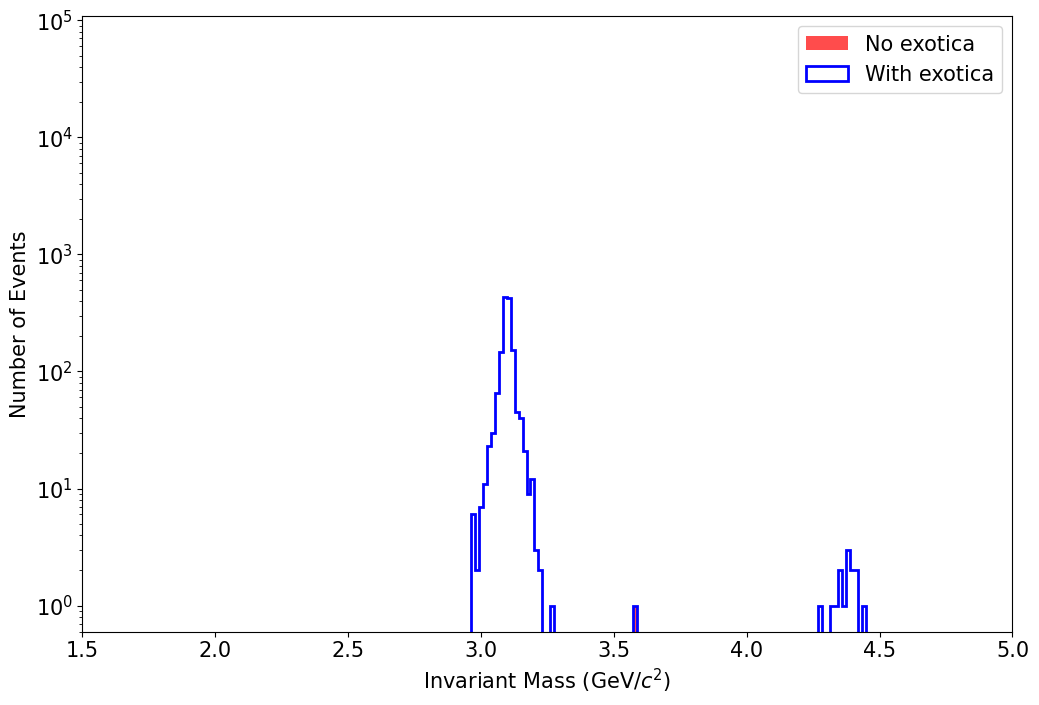

In [27]:
mse_threshold = 0.01

# alice_noexotica_high_mse = new_df_all_nopq_shuffled[mse_alice_noexotica > mse_threshold]
# alice_noexotica_masses = alice_noexotica_high_mse['InvariantMass'].values

# # Filter cocktail with exotica with reconstruction error above the threshold
# alice_exotica_high_mse = new_df_all_anomalies_shuffled[mse_alice_exotica > mse_threshold]
# alice_exotica_masses = alice_exotica_high_mse['InvariantMass'].values

combined_masses = np.concatenate([alice_noexotica_masses, alice_exotica_masses])

n_bins = 100

bin_edges = np.linspace(combined_masses.min(), combined_masses.max(), n_bins + 1)

# Plot the invariant mass distribution
plt.figure(figsize=(12, 8))

plt.hist(alice_noexotica_masses, bins=bin_edges, alpha=0.7, label='No exotica', color='red')
plt.hist(alice_exotica_masses, bins=bin_edges, histtype='step', color='blue', linewidth=2, label='With exotica')

# Add labels and title
plt.xlabel(r'Invariant Mass (GeV/$c^2$)')
plt.ylabel('Number of Events')
plt.xlim(1.5,5)
#plt.ylim(0.1,100)
plt.yscale('log')
#plt.title(f'Invariant Mass Distribution for Events with MSE > {mse_threshold}')
plt.ylim(0.6,110000)
plt.legend()
plt.savefig("final_mass2.pdf")
# Show the plot
plt.show()

In [28]:

pq_count = np.sum((alice_exotica_masses >= 4) & (alice_exotica_masses <= 5))
print(pq_count)

number = np.sum((alice_exotica_masses >= 2.8) & (alice_exotica_masses <= 3.2))
print(number)

#np.sum((alice_exotica_masses >= 4) & (alice_exotica_masses <= 5))

14
1427


In [29]:
# # Filter cocktail no exotica with reconstruction error above the threshold
# alice_noexotica_high_mse = df_all_shuffled_nopq_mass[mse_alice_noexotica > mse_threshold]
# alice_noexotica_masses = alice_noexotica_high_mse['InvariantMass'].values

# # Filter cocktail with exotica with reconstruction error above the threshold
# alice_exotica_high_mse = df_all_shuffled_mass[mse_alice_exotica > mse_threshold]
# alice_exotica_masses = alice_exotica_high_mse['InvariantMass'].values

# # Plot the invariant mass distribution
# plt.figure(figsize=(12, 8))

# plt.hist(alice_noexotica_masses, bins=100, alpha=0.7, label='ALICE without exotica', edgecolor = 'blue', color = 'none')
# plt.hist(alice_exotica_masses, bins=100, alpha=0.7, label='ALICE with exotica', color='red')

# # Add labels and title
# plt.xlabel('Invariant Mass')
# plt.ylabel('Number of Events')
# plt.yscale('log')
# plt.title(f'Invariant Mass Distribution for Events with MSE > {mse_threshold}')
# plt.legend()

# # Show the plot
# plt.show()


In [30]:
# new_pq2 = new_df_all_2pq_shuffled[['NTracks','NSigmaEl1','NSigmaMu1','NSigmaPi1','NSigmaKa1','NSigmaPr1','NSigmaEl2','NSigmaMu2','NSigmaPi2','NSigmaKa2','NSigmaPr2','NSigmaEl3','NSigmaMu3','NSigmaPi3','NSigmaKa3','NSigmaPr3','NSigmaEl4','NSigmaMu4','NSigmaPi4','NSigmaKa4','NSigmaPr4']].values
# # # Extract mass separately
# # mass = df['mass'].values
# mass_new_pq2 = new_df_all_2pq_shuffled['InvariantMass'].values

# new_pq2 = scaler.transform(new_pq2)

In [31]:
# new_df_all_2pq_shuffled

In [32]:
# new_pq2_pred = autoencoder.predict(new_pq2)
# mse_new_pq2 = np.mean(np.power(new_pq2 - new_pq2_pred, 2), axis=1)


In [33]:
# # Set the reconstruction error threshold
# mse_threshold = .01  # Adjust this value as needed

# # Filter test events with reconstruction error above the threshold
# new_2pq_high_mse_indices = mse_new_pq2 > mse_threshold  # Boolean mask for filtering
# new_2pq_high_mse_masses = mass_new_pq2[new_2pq_high_mse_indices]

# # Plot the invariant mass distribution
# plt.figure(figsize=(12, 8))

# plt.hist(new_2pq_high_mse_masses, bins=50, alpha=0.7, label='Anomalous Test Events', color='blue')
# # plt.hist(pentaquark_masses, bins=50, alpha=0.7, label='Pentaquark Events', color='red')
# # plt.hist(psi2s_masses, bins=50, alpha=0.7, label='Psi2s -> J/Psi + Pions Events', color='green')

# # Add labels and title
# plt.xlabel('Invariant Mass')
# plt.ylabel('Number of Events')
# plt.yscale('log')
# plt.title(f'Invariant Mass Distribution for Events with MSE > {mse_threshold} with 2 pentaquarks')
# plt.legend()

# # Show the plot
# plt.show()


In [34]:
# new_2pq_high_mse_masses

In [35]:
# plt.figure(figsize=(10, 6))
# plt.xscale('log')  # Log scale for x-axis
# plt.yscale('log')  # Log scale for y-axis

# plt.hist(mse_new_pq2, bins=50, alpha=0.7, label='Normal Events', color='blue')

# plt.xlabel('Reconstruction Error')
# plt.ylabel('Number of Events')
# plt.title('Reconstruction Error Distribution for Normal and Anomalous Events with 2 Pentaquarks')
# plt.legend()

# # Show the plot
# plt.show()

In [36]:
# number_pqs_2 = np.sum((new_2pq_high_mse_masses >= 4) & (new_2pq_high_mse_masses <= 5))
# number_pqs_2


### Jpsi -> 4 pions sigma dfs

In [37]:
# new_df_all_jpsi4pi_sigma

In [38]:
# new_with_jpsi4pi = new_df_all_jpsi4pi_sigma[['NTracks','NSigmaEl1','NSigmaMu1','NSigmaPi1','NSigmaKa1','NSigmaPr1','NSigmaEl2','NSigmaMu2','NSigmaPi2','NSigmaKa2','NSigmaPr2','NSigmaEl3','NSigmaMu3','NSigmaPi3','NSigmaKa3','NSigmaPr3','NSigmaEl4','NSigmaMu4','NSigmaPi4','NSigmaKa4','NSigmaPr4']].values
# # # Extract mass separately
# # mass = df['mass'].values
# mass_new_with_jpsi_4pi = new_df_all_jpsi4pi_sigma['InvariantMass'].values

# new_with_jpsi4pi = scaler.transform(new_with_jpsi4pi)

In [39]:
# new_with_jpsi4pi

In [40]:
# new_with_jpsi4pi_pred = autoencoder.predict(new_with_jpsi4pi)
# mse_new_with_jpsi_4pi = np.mean(np.power(new_with_jpsi4pi - new_with_jpsi4pi_pred, 2), axis=1)

In [41]:
# # Set the reconstruction error threshold
# mse_threshold = .01  # Adjust this value as needed

# # Filter test events with reconstruction error above the threshold
# new_with_jpsi_4pi_high_mse_indices = mse_new_with_jpsi_4pi > mse_threshold  # Boolean mask for filtering
# new_with_jpsi_4pi_high_mse_masses = mass_new_with_jpsi_4pi[new_with_jpsi_4pi_high_mse_indices]

# # Plot the invariant mass distribution
# plt.figure(figsize=(12, 8))

# plt.hist(new_with_jpsi_4pi_high_mse_masses, bins=50, alpha=0.7, label='Anomalous Test Events', color='blue')
# # plt.hist(pentaquark_masses, bins=50, alpha=0.7, label='Pentaquark Events', color='red')
# # plt.hist(psi2s_masses, bins=50, alpha=0.7, label='Psi2s -> J/Psi + Pions Events', color='green')

# # Add labels and title
# plt.xlabel('Invariant Mass')
# plt.ylabel('Number of Events')
# plt.yscale('log')
# plt.title(f'Invariant Mass Distribution for Events with MSE > {mse_threshold} with 2 pentaquarks')
# plt.legend()

# # Show the plot
# plt.show()


In [42]:
# jpsi4pi_sigma_filtered = new_df_jpsi4pi_sigma_filtered[['NTracks','NSigmaEl1','NSigmaMu1','NSigmaPi1','NSigmaKa1','NSigmaPr1','NSigmaEl2','NSigmaMu2','NSigmaPi2','NSigmaKa2','NSigmaPr2','NSigmaEl3','NSigmaMu3','NSigmaPi3','NSigmaKa3','NSigmaPr3','NSigmaEl4','NSigmaMu4','NSigmaPi4','NSigmaKa4','NSigmaPr4']].values

# mass_jpsi_4pi = new_df_jpsi4pi_sigma_filtered['InvariantMass'].values
# mass_jpsi_4pi

# jpsi4pi_sigma_filtered = scaler.transform(jpsi4pi_sigma_filtered)

In [43]:
# jpsi4pi_pred = autoencoder.predict(jpsi4pi_sigma_filtered)
# mse_jpsi_4pi = np.mean(np.power(jpsi4pi_sigma_filtered - jpsi4pi_pred, 2), axis=1)

In [44]:
# # Set the reconstruction error threshold
# mse_threshold = .01  # Adjust this value as needed

# # Filter test events with reconstruction error above the threshold
# jpsi_4pi_high_mse_indices = mse_jpsi_4pi > mse_threshold  # Boolean mask for filtering
# jpsi_4pi_high_mse_masses = mass_jpsi_4pi[jpsi_4pi_high_mse_indices]

# # Plot the invariant mass distribution
# plt.figure(figsize=(12, 8))

# plt.hist(jpsi_4pi_high_mse_masses, bins=50, alpha=0.7, label='Anomalous Test Events', color='blue')
# # plt.hist(pentaquark_masses, bins=50, alpha=0.7, label='Pentaquark Events', color='red')
# # plt.hist(psi2s_masses, bins=50, alpha=0.7, label='Psi2s -> J/Psi + Pions Events', color='green')

# # Add labels and title
# plt.xlabel('Invariant Mass')
# plt.ylabel('Number of Events')
# plt.yscale('log')
# plt.title(f'Invariant Mass Distribution for Events with MSE > {mse_threshold} for Jpsi -> 4 pions')
# plt.legend()

# # Show the plot
# plt.show()


In [45]:
# new_df_all_jpsi3pi_sigma = pd.read_pickle("new_df_all_jpsi3pi_sigma.pkl")

# new_df_jpsi3pi_sigma_filtered = pd.read_pickle("new_df_jpsi3pi_sigma_filtered.pkl")
# new_df_jpsi3pi_sigma_filtered            

In [46]:
# jpsi3pi_all_sigma = new_df_all_jpsi3pi_sigma[['NTracks','NSigmaEl1','NSigmaMu1','NSigmaPi1','NSigmaKa1','NSigmaPr1','NSigmaEl2','NSigmaMu2','NSigmaPi2','NSigmaKa2','NSigmaPr2','NSigmaEl3','NSigmaMu3','NSigmaPi3','NSigmaKa3','NSigmaPr3','NSigmaEl4','NSigmaMu4','NSigmaPi4','NSigmaKa4','NSigmaPr4']].values

# mass_jpsi_3pi_all = new_df_all_jpsi3pi_sigma['InvariantMass'].values
# mass_jpsi_3pi_all

# jpsi3pi_all_sigma = scaler.transform(jpsi3pi_all_sigma)

In [47]:
# jpsi3pi_all_sigma_pred = autoencoder.predict(jpsi3pi_all_sigma)
# mse_jpsi_3pi_all_sigma = np.mean(np.power(jpsi3pi_all_sigma - jpsi3pi_all_sigma_pred, 2), axis=1)

In [48]:
# # Set the reconstruction error threshold
# mse_threshold = .01  # Adjust this value as needed

# # Filter test events with reconstruction error above the threshold
# jpsi_3pi_all_high_mse_indices = mse_jpsi_3pi_all_sigma > mse_threshold  # Boolean mask for filtering
# jpsi_3pi_all_high_mse_masses = mass_jpsi_3pi_all[jpsi_3pi_all_high_mse_indices]

# # Plot the invariant mass distribution
# plt.figure(figsize=(12, 8))

# plt.hist(jpsi_3pi_all_high_mse_masses, bins=50, alpha=0.7, label='Anomalous Test Events', color='blue')
# # plt.hist(pentaquark_masses, bins=50, alpha=0.7, label='Pentaquark Events', color='red')
# # plt.hist(psi2s_masses, bins=50, alpha=0.7, label='Psi2s -> J/Psi + Pions Events', color='green')

# # Add labels and title
# plt.xlabel('Invariant Mass')
# plt.ylabel('Number of Events')
# plt.yscale('log')
# plt.title(f'Invariant Mass Distribution for Events with MSE > {mse_threshold} with Jpsi -> 3 pions')
# plt.legend()

# # Show the plot
# plt.show()


In [49]:
# jpsi3pi = new_df_jpsi3pi_sigma_filtered[['NTracks','NSigmaEl1','NSigmaMu1','NSigmaPi1','NSigmaKa1','NSigmaPr1','NSigmaEl2','NSigmaMu2','NSigmaPi2','NSigmaKa2','NSigmaPr2','NSigmaEl3','NSigmaMu3','NSigmaPi3','NSigmaKa3','NSigmaPr3','NSigmaEl4','NSigmaMu4','NSigmaPi4','NSigmaKa4','NSigmaPr4']].values

# mass_jpsi_3pi = new_df_jpsi3pi_sigma_filtered['InvariantMass'].values
# mass_jpsi_3pi

# jpsi3pi = scaler.transform(jpsi3pi)

In [50]:
# jpsi3pi_pred = autoencoder.predict(jpsi3pi)
# mse_jpsi_3pi = np.mean(np.power(jpsi3pi - jpsi3pi_pred, 2), axis=1)

In [51]:
# # Set the reconstruction error threshold
# mse_threshold = .01  # Adjust this value as needed

# # Filter test events with reconstruction error above the threshold
# jpsi_3pi_high_mse_indices = mse_jpsi_3pi > mse_threshold  # Boolean mask for filtering
# jpsi_3pi_high_mse_masses = mass_jpsi_3pi[jpsi_3pi_high_mse_indices]

# # Plot the invariant mass distribution
# plt.figure(figsize=(12, 8))

# plt.hist(jpsi_3pi_high_mse_masses, bins=50, alpha=0.7, label='Anomalous Test Events', color='blue')
# # plt.hist(pentaquark_masses, bins=50, alpha=0.7, label='Pentaquark Events', color='red')
# # plt.hist(psi2s_masses, bins=50, alpha=0.7, label='Psi2s -> J/Psi + Pions Events', color='green')

# # Add labels and title
# plt.xlabel('Invariant Mass')
# plt.ylabel('Number of Events')
# plt.yscale('log')
# plt.title(f'Invariant Mass Distribution for Events with MSE > {mse_threshold} for Jpsi -> 3 pions only')
# plt.legend()

# # Show the plot
# plt.show()


In [52]:
# jpsi_3pi_high_mse_masses